<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#covar-calculations" data-toc-modified-id="covar-calculations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>covar calculations</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Normal-period---sector-wise" data-toc-modified-id="Normal-period---sector-wise-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Normal period - sector wise</a></span></li><li><span><a href="#Shock-period---sector-wise" data-toc-modified-id="Shock-period---sector-wise-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Shock period - sector wise</a></span></li></ul></li><li><span><a href="#State-Space-regression" data-toc-modified-id="State-Space-regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>State Space regression</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import yfinance as yf
from yahoofinancials import YahooFinancials
import pandas_datareader.data as web
from scipy import stats
from statsmodels.regression.quantile_regression import QuantReg as qr
import statsmodels.api as sma
import pickle
import warnings
warnings.filterwarnings('ignore')

C:\Users\amand\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Load Data

In [2]:
system = yf.download('^GSPC', 
                      progress=False)
system.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


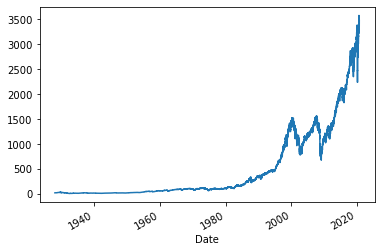

In [3]:
system['Adj Close'].plot()

In [4]:
sector = pd.read_csv('./Data/snp_tickers_sectors.csv',index_col = 0)
col_name = sector.columns[2]
sector.head()

,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
Symbol,,,,,,,,
MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",8/9/1976,66740.0,1902
ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",3/31/1964,1800.0,1888
ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",12/31/2012,1551152.0,2013 (1888)
ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",5/31/2018,815094.0,1981
ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",7/6/2011,1467373.0,1989


In [5]:
snp_stocks = list(sector.index)
len(snp_stocks)

505

In [6]:
def download_stock(stock):
    """ try to query the iex for a stock, if failed note with print """
    try:
        #print(stock)
        stock_df = web.DataReader(stock,'yahoo',start=dt.date(1970,1,1))
        stock_df['Name'] = stock
        output_name = stock + '_data.csv'
        #stock_df.to_csv(output_name)
        return stock_df
    except:
        bad_names.append(stock)
        print('bad: %s' % (stock))

In [7]:
# bad_names = []
# stock_data = {}
# for sym in snp_stocks:
#     print(sym)
#     try:
#         stock_data[sym] = download_stock(sym)
#     except:
#         pass

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
AOS
APA
AIV
AAPL
AMAT
APTV
ADM
ANET
AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
BKR
BLL
BAC
BK
BAX
BDX
BRK.B
bad: BRK.B
BBY
BIO
BIIB
BLK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BF.B
bad: BF.B
CHRW
COG
CDNS
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CERN
CF
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ETR
EOG
EFX
EQIX
EQR
ESS
EL
ETSY
EVRG
ES
RE
EXC
EXPE
EXPD
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FRC
FISV
FLT
FLIR
FLS
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GPS
GRMN
IT
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS
GWW
HAL
HBI
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HFC
HOLX
HD
HON
HRL
HST

In [9]:
# with open('./Data/stock_data','wb') as f:
#     pickle.dump(stock_data,f,pickle.HIGHEST_PROTOCOL)

In [8]:
for sym in bad_names:
    stock_data.pop(sym)

In [10]:
with open('./Data/stock_data','rb') as f:
    stock_data = pickle.load(f)

# covar calculations

In [11]:
def quantile_reg(system_losses,roll_var,q):
    Y = system_losses.copy()
    X = roll_var.copy()
    common_index = X.dropna().index.intersection(Y.dropna().index)
    X = X.loc[common_index]
    Y = Y.loc[common_index]
    model = qr(Y,sma.add_constant(X)).fit(q = 0.99)
    return model
    
    
    
    

def est_delta_covar(system_losses,stock_losses,q,roll_window,method='emp'):
    if((method != 'emp')and(method!='norm')):
        raise Exception('Wrong input for method')
    
    if(method == 'emp'):
        roll_var = stock_losses.rolling(window = roll_window,min_periods = int(0.8*roll_window))\
                                    .apply(lambda x: np.quantile(x,q))
        
        roll_median = stock_losses.rolling(window = roll_window,min_periods = int(0.8*roll_window)).median()
        
    else:
        roll_median = stock_losses.rolling(window = roll_window,min_periods = int(0.8*roll_window)).mean()
        std = stock_losses.rolling(window = roll_window,min_periods = int(0.8*roll_window)).std()
        
        roll_var = roll_median + stats.norm.ppf(q) * std
        
    model_q = quantile_reg(system_losses,roll_var,q)
    model_median = quantile_reg(system_losses,roll_median,q)
        
        #import pdb;pdb.set_trace()
        
    delta_covar = model_q.params['Adj Close'] * (model_q.fittedvalues - model_median.fittedvalues)

        
    return delta_covar,roll_var

        


In [12]:
stock_losses = {}
for sym in stock_data.keys():
        adj_close = stock_data[sym]['Adj Close'].resample('1W').last().dropna()
        stock_losses[sym] = 100* (adj_close.shift(1) - adj_close)/adj_close.shift(1)

In [13]:
system_close = system['Adj Close'].resample('1W').last().dropna()
system_losses = 100* (system_close.shift(1) - system_close)/system_close.shift(1)

In [28]:
delta_covar_dict = {}
roll_var_dict = {}
shock_df = pd.DataFrame()
normal_df = pd.DataFrame()
roll_window = 52*3
normal_date = dt.date(2018,5,13)
q = 0.99

for sym in stock_data.keys():
    
    try:
        delta_covar_dict[sym],roll_var_dict[sym] = est_delta_covar(system_losses,stock_losses[sym],q,roll_window)
        shock_df.loc[sym,'Delta Covar'] = delta_covar_dict[sym][-1]
        shock_df.loc[sym,'VaR'] = roll_var_dict[sym][-1]
        shock_df.loc[sym,'Sector'] = sector.loc[sym,col_name]

        normal_df.loc[sym,'Delta Covar'] = delta_covar_dict[sym].loc[normal_date]
        normal_df.loc[sym,'VaR'] = roll_var_dict[sym].loc[normal_date]
        normal_df.loc[sym,'Sector'] = sector.loc[sym,col_name]
    except:
        print(sym)

CARR
CTVA
DOW
FTV
FOXA
FOX
HWM
IR
LW
LUMN
OTIS
VIAC
VNT


Text(0.5, 0, 'VaR')

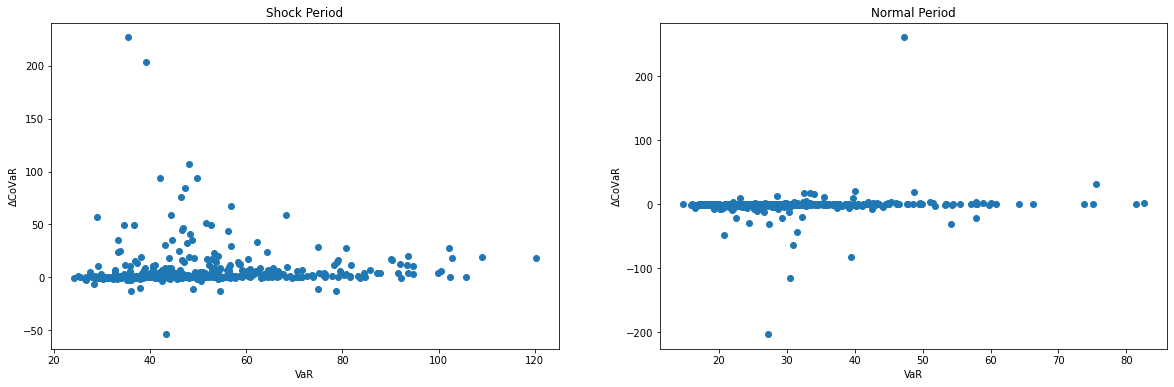

In [39]:
fig,axs = plt.subplots(1,2,figsize = (20,6))
axs[0].scatter(shock_df['VaR']*(13**0.5),shock_df['Delta Covar']*(13**0.5))
axs[1].scatter(normal_df['VaR']*(13**0.5),normal_df['Delta Covar']*(13**0.5))
axs[1].set_title('Normal Period')
axs[0].set_title('Shock Period')

axs[0].set_ylabel('$\Delta$CoVaR')
axs[0].set_xlabel('VaR')

axs[1].set_ylabel('$\Delta$CoVaR')
axs[1].set_xlabel('VaR')

### Normal period - sector wise

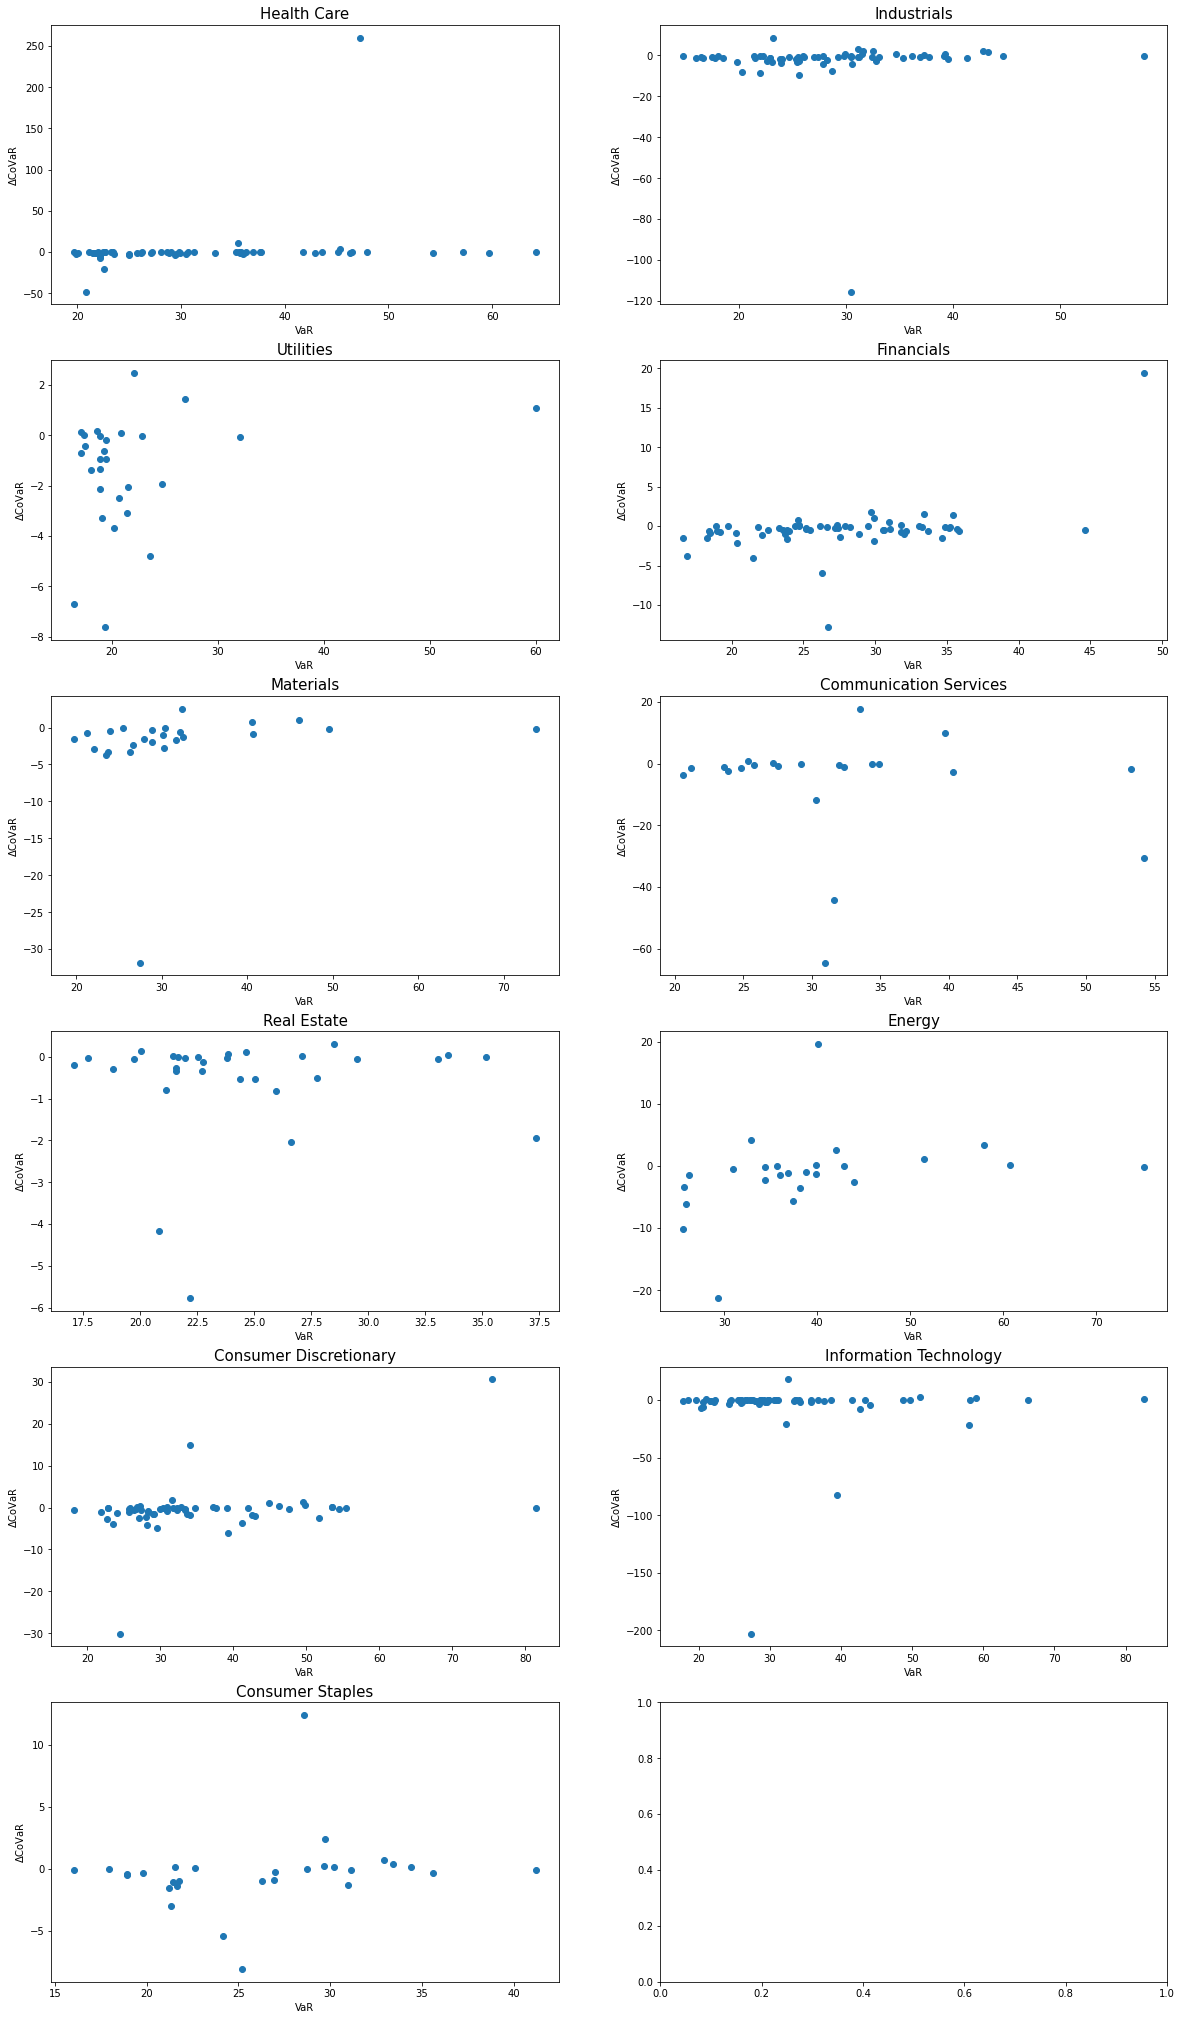

In [43]:
sector_names = list(set(list(sector[col_name])))
fig,axs = plt.subplots(6,2,figsize = (20,36))
axs = np.reshape(axs,12)
for i,sec in enumerate(sector_names):
    tp = normal_df.loc[normal_df['Sector'] == sec]
    axs[i].scatter(tp['VaR']*(13**0.5),tp['Delta Covar']*(13**0.5))
    axs[i].set_ylabel('$\Delta$CoVaR')
    axs[i].set_xlabel('VaR')
    axs[i].set_title(sec,fontsize = 15)

### Shock period - sector wise

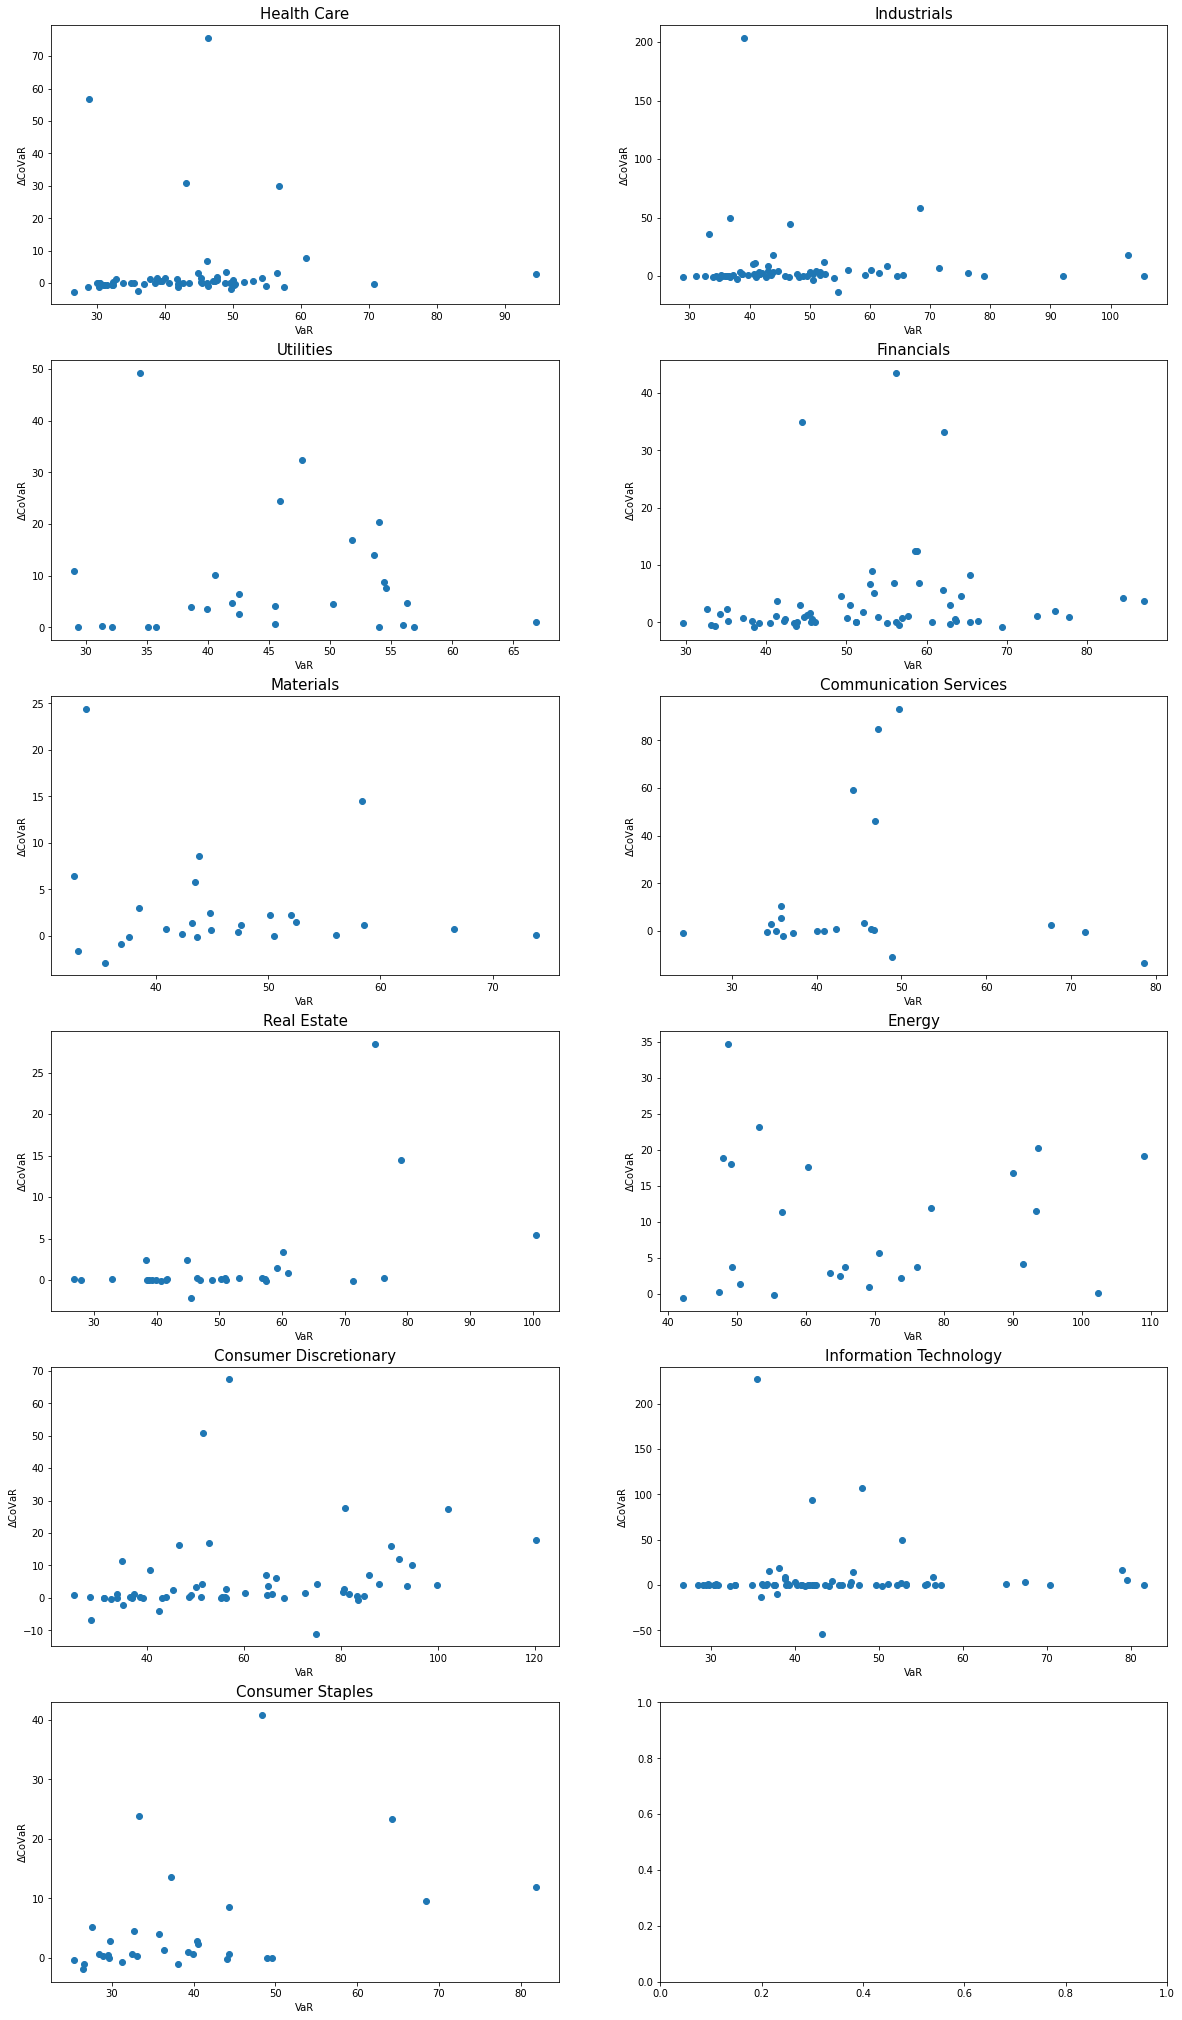

In [44]:
sector_names = list(set(list(sector[col_name])))
fig,axs = plt.subplots(6,2,figsize = (20,36))
axs = np.reshape(axs,12)
for i,sec in enumerate(sector_names):
    tp = shock_df.loc[shock_df['Sector'] == sec]
    axs[i].scatter(tp['VaR']*(13**0.5),tp['Delta Covar']*(13**0.5))
    axs[i].set_ylabel('$\Delta$CoVaR')
    axs[i].set_xlabel('VaR')
    axs[i].set_title(sec,fontsize = 15)

In [56]:
correlation = pd.DataFrame()
for sym in delta_covar_dict.keys():
    tp = pd.DataFrame()
    tp['1'] = delta_covar_dict[sym]
    tp['2'] = roll_var_dict[sym]
    correlation.loc[sym,'Corr'] = tp.corr().iloc[0,1]
correlation

,Corr
MMM,0.988049
ABT,0.973913
ABBV,0.848704
ABMD,0.143228
ACN,0.996370
...,...
YUM,0.603499
ZBRA,0.591857
ZBH,0.671909
ZION,0.342774


## State Space regression

In [150]:
M = pd.DataFrame()

In [151]:
delta_yield = pd.read_csv('./Data/Chng_3month_yield.csv',index_col = 0,parse_dates = True)
delta_yield.replace('.',np.nan,inplace = True)
delta_yield = delta_yield.astype(float)
delta_yield.columns = ['Value']
delta_yield.index  = pd.to_datetime(delta_yield.index)
M['Delta_yield'] = delta_yield['Value']
delta_yield.head()

,Value
DATE,
1954-01-04,NaN
1954-01-05,-0.05
1954-01-06,0.00
1954-01-07,0.03
1954-01-08,0.00


In [152]:
tbill_rate = pd.read_csv('./Data/FRED-DTB3.csv',index_col = 0,parse_dates = True)
tbill_rate = tbill_rate.iloc[::-1]
tbill_rate = tbill_rate.astype(float)
tbill_rate.head()

,Value
Date,
1954-01-04,1.33
1954-01-05,1.28
1954-01-06,1.28
1954-01-07,1.31
1954-01-08,1.31


In [153]:
lterm_rate = pd.DataFrame()
data1 = pd.read_csv('./Data/DLTBOARD.csv',index_col = 0,parse_dates = True)
data1.replace('.',np.nan,inplace = True)
data1 = data1.astype(float)
data1 = data1[data1.columns[0]]

data2 = pd.read_csv('./Data/USTREASURY-LONGTERMRATES.csv',index_col = 0,parse_dates = True)
data2 = data2[data2.columns[0]]
data2 = data2.iloc[::-1]
data2 = data2.astype(float)

tp = data1.append(data2)
lterm_rate['Value'] = tp
lterm_rate.head()

,Value
1981-07-01,12.92
1981-07-02,12.82
1981-07-03,NaN
1981-07-06,12.68
1981-07-07,12.91


In [154]:
delta_slope = pd.DataFrame()
delta_slope['Delta_slope'] = tbill_rate['Value'] - lterm_rate['Value']
delta_slope.dropna(inplace = True)
delta_slope.index  = pd.to_datetime(delta_slope.index)
M = pd.concat([M,delta_slope],axis = 1,join='inner')
M.head()

,Delta_yield,Delta_slope
1981-07-01,0.37,1.73
1981-07-02,-0.17,1.66
1981-07-06,NaN,1.67
1981-07-07,0.54,1.98
1981-07-08,0.09,2.04


In [156]:
len(M)

9907

In [160]:
libor = pd.read_csv('./Data/USD3MTD156N.csv',index_col = 0,parse_dates=True)
libor.replace('.',np.nan,inplace = True)
libor = libor.astype(float)
ted_spread = pd.DataFrame()
ted_spread['TED_spread'] = libor[libor.columns[0]] - tbill_rate['Value'] 
ted_spread.dropna(inplace=True)
M['TED_spread'] = ted_spread['TED_spread']
M.tail()

,Delta_yield,Delta_slope,TED_spread
2020-08-25,-0.01,-1.12,0.14100
2020-08-26,0.00,-1.14,0.14588
2020-08-27,0.00,-1.22,0.13600
2020-08-28,-0.01,-1.25,0.14088
2020-08-31,0.01,-1.20,NaN


In [162]:
delta_credit_spread = pd.read_csv('./Data/Chng_CrediT_Spread.csv',index_col = 0,parse_dates=True)
delta_credit_spread.replace('.',np.nan,inplace = True)
delta_credit_spread = delta_credit_spread.astype(float)
delta_credit_spread.columns = ['Value']
M['Delta_cs'] = delta_credit_spread['Value']
M.tail()

,Delta_yield,Delta_slope,TED_spread,Delta_cs
2020-08-25,-0.01,-1.12,0.14100,0.00
2020-08-26,0.00,-1.14,0.14588,0.03
2020-08-27,0.00,-1.22,0.13600,0.05
2020-08-28,-0.01,-1.25,0.14088,0.00
2020-08-31,0.01,-1.20,NaN,-0.04


In [163]:
system_close = system['Adj Close']
rets = (system_close - system_close.shift(1))/system_close.shift(1)
vol = rets.rolling(window = 22).std()
M['vol'] = vol
M.tail()

,Delta_yield,Delta_slope,TED_spread,Delta_cs,vol
2020-08-25,-0.01,-1.12,0.14100,0.00,0.005750
2020-08-26,0.00,-1.14,0.14588,0.03,0.005879
2020-08-27,0.00,-1.22,0.13600,0.05,0.005479
2020-08-28,-0.01,-1.25,0.14088,0.00,0.005169
2020-08-31,0.01,-1.20,NaN,-0.04,0.005077


In [111]:
M

,Delta_yield
DATE,
1954-01-04,NaN
1954-01-05,-0.05
1954-01-06,0.00
1954-01-07,0.03
1954-01-08,0.00
...,...
2020-09-10,0.00
2020-09-11,-0.01
2020-09-14,0.00


In [116]:
pd.concat([M,delta_slope],axis=1,join='inner')

,Delta_yield,Value
1981-07-01,0.37,1.73
1981-07-02,-0.17,1.66
1981-07-06,NaN,1.67
1981-07-07,0.54,1.98
1981-07-08,0.09,2.04
...,...,...
2020-08-25,-0.01,-1.12
2020-08-26,0.00,-1.14
2020-08-27,0.00,-1.22
2020-08-28,-0.01,-1.25


In [112]:
delta_slope['Value']

1981-07-01    1.73
1981-07-02    1.66
1981-07-06    1.67
1981-07-07    1.98
1981-07-08    2.04
              ... 
2020-08-25   -1.12
2020-08-26   -1.14
2020-08-27   -1.22
2020-08-28   -1.25
2020-08-31   -1.20
Name: Value, Length: 9907, dtype: float64

In [120]:
a = delta_yield.index.intersection(delta_slope.index)

In [128]:
a.intersection(vol.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [125]:
len(a)

8797

In [130]:
vol.index

DatetimeIndex(['1928-01-01', '1928-01-08', '1928-01-15', '1928-01-22',
               '1928-01-29', '1928-02-05', '1928-02-12', '1928-02-19',
               '1928-02-26', '1928-03-04',
               ...
               '2020-08-09', '2020-08-16', '2020-08-23', '2020-08-30',
               '2020-09-06', '2020-09-13', '2020-09-20', '2020-09-27',
               '2020-10-04', '2020-10-11'],
              dtype='datetime64[ns]', name='Date', length=4841, freq=None)